In [434]:
%pip install scikit-learn seaborn matplotlib pandas numpy pydotplus IPython graphviz six

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

import pydotplus
from six import StringIO
from IPython.display import Image

In [436]:
df_train = pd.read_csv('./data/CellPhone_train.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


check null data

In [437]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Definition of dataset columns   

Features   

battery_power : Total energy of the battery can be stored(mAh)   
blue : the device has blutooth or not, yes/no (1/0)   
clock_speed : the speed of execution of instructions by microprocessor   
dual_sim : the device has two SIM card at the same time or not   
fc : the quality of front camera in MegaPixel
four_g : the device has 4G network or not   
int_memory : internal memory in GigaByte   
m_dep : the device depth in CM   
mobile_wt : the weight of device   
n_cores : the number of processor cores    
pc : the quality of primary camera in MegePixel    
px_height : the height of pixel resolution   
px_width : the width of pixel resolution   
ram : random access memory in MegaByte   
sc_h : the height of device screen in CM    
sc_w : the width of device screen in CM   
talk_time : the maximum talk time that the full charge battery of the device can support   
three_g : the device has 3G network or not   
touch_screen : the device has touch screen or not   
wifi : the device has wifi or not   
  
Target   

price_range : the categorized price of the device   
low cost = 0   
medium cost = 1   
high cost = 2   
very high cost = 3   

In [438]:
# drop duplicates
df_train = df_train.drop_duplicates()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [439]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


จะสังเกตว่า จะมีบางฟีเจอร์ที่ใช้ตัวเลขในการแทนว่า มีหรือไม่มี และบางฟีเจอร์ที่ใช้ตัวเลขในการแทนค่าของฟีเจอร์นั้นๆ ดังนี้
- blue : 0 = no, 1 = yes
- dual_sim : 0 = no, 1 = yes
- four_g : 0 = no, 1 = yes
- three_g : 0 = no, 1 = yes
- touch_screen : 0 = no, 1 = yes
- wifi : 0 = no, 1 = yes



In [440]:
# show the discrete of each column
for col in df_train.columns:
    print(f"{col}: {sorted(df_train[col].unique())}")

battery_power: [501, 502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 514, 516, 517, 518, 519, 520, 523, 525, 527, 528, 530, 531, 532, 534, 535, 536, 537, 538, 539, 541, 543, 544, 545, 546, 547, 548, 550, 551, 553, 554, 555, 557, 558, 559, 560, 561, 563, 564, 565, 568, 569, 570, 571, 574, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 587, 589, 590, 591, 592, 593, 594, 595, 596, 598, 599, 600, 601, 602, 603, 605, 606, 608, 609, 610, 612, 614, 615, 616, 617, 618, 621, 622, 623, 625, 626, 627, 628, 630, 633, 634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 648, 649, 651, 652, 654, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 671, 672, 673, 674, 675, 676, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 694, 695, 696, 697, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 712, 713, 714, 715, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 737, 739, 740, 741, 742, 743, 744, 745, 748, 752, 753, 754, 755, 757, 759, 761, 763,

In [441]:
df_train[df_train['px_height'] <= 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [442]:
df_train[df_train['sc_w'] <= 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


Clean out the data that may be noise (181 rows)

In [443]:
df_train = df_train.drop(df_train[df_train['px_height'] <= 0].index)
df_train = df_train.drop(df_train[df_train['sc_w'] <= 0].index)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


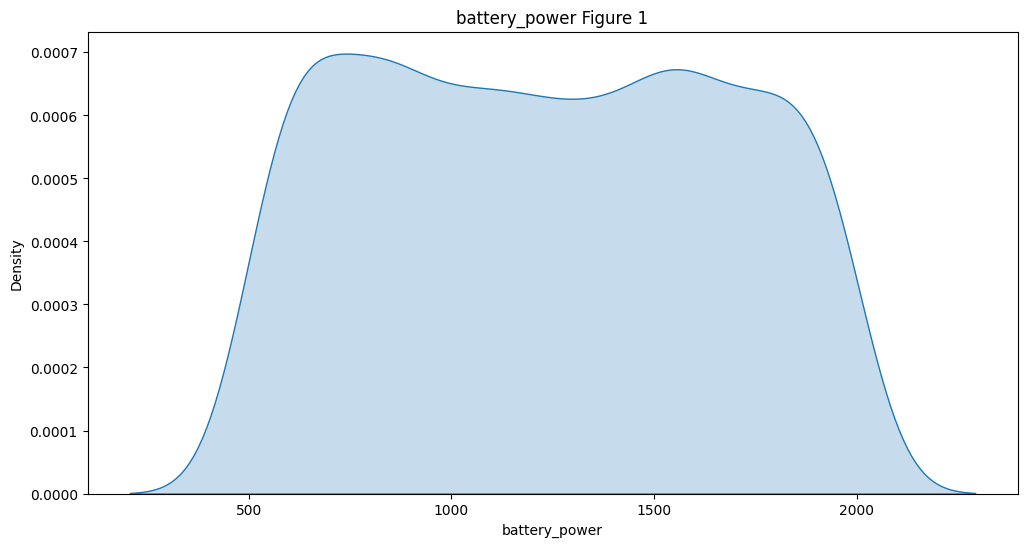

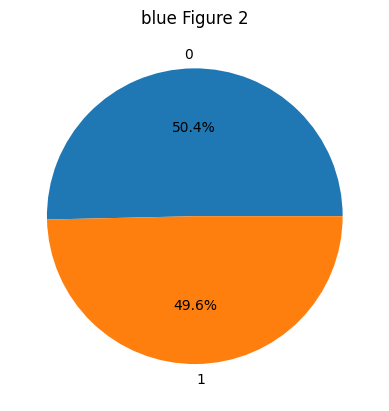

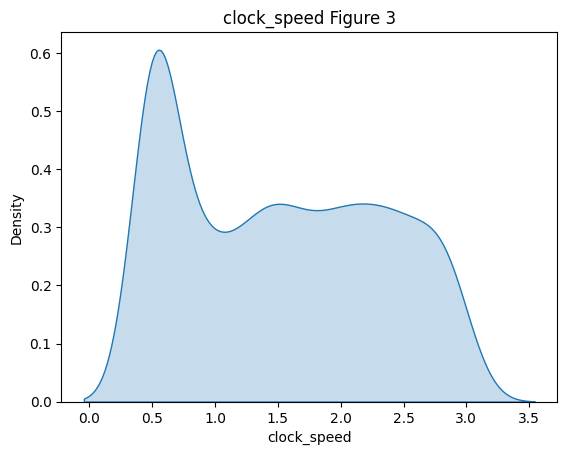

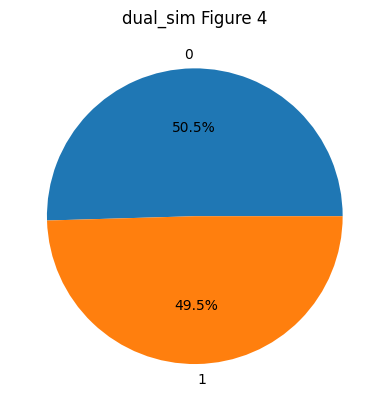

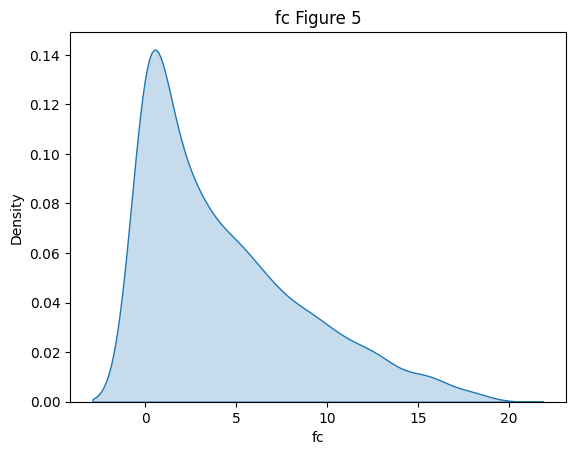

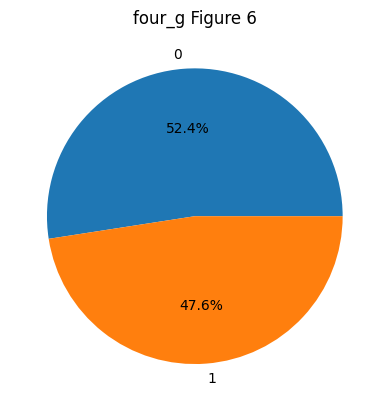

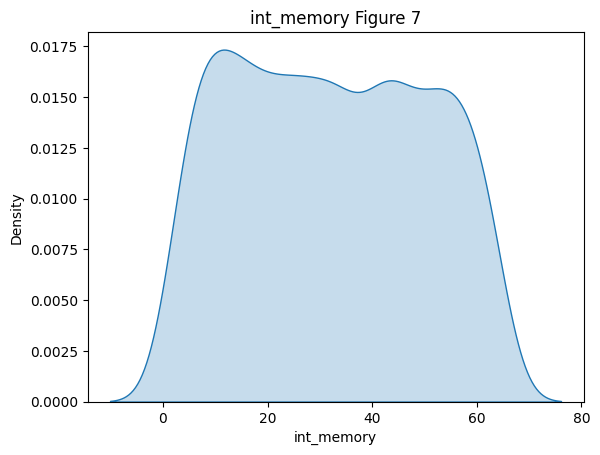

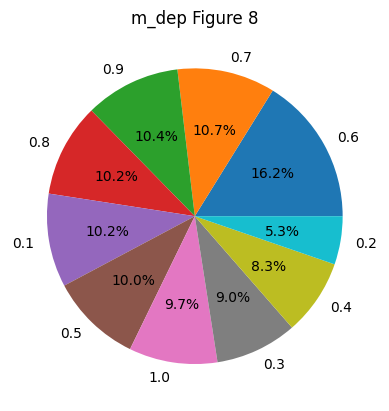

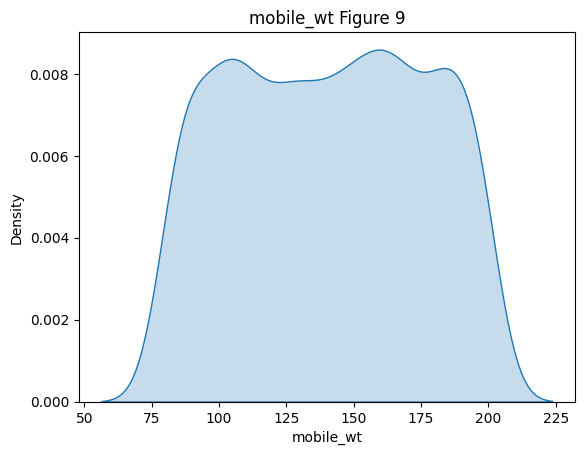

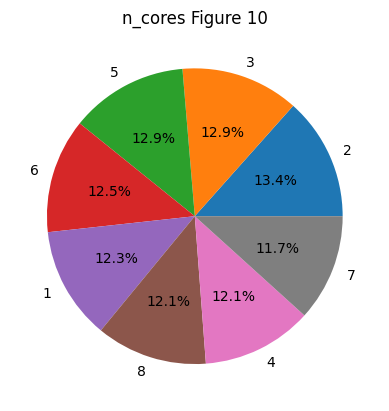

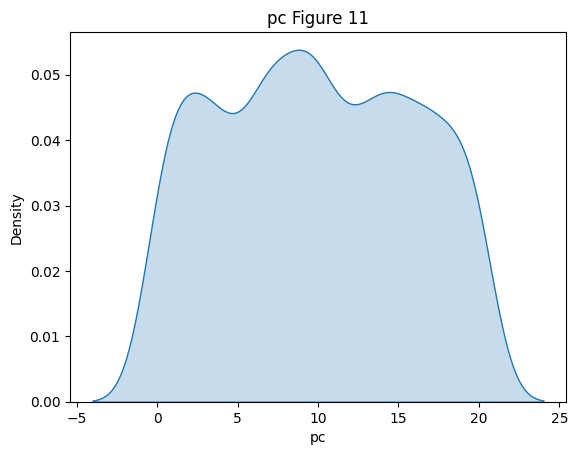

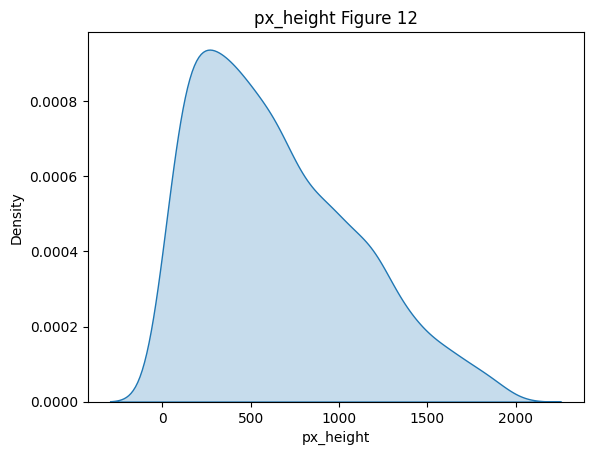

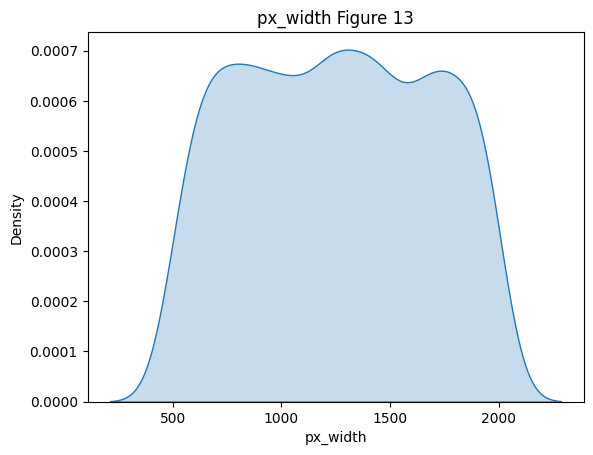

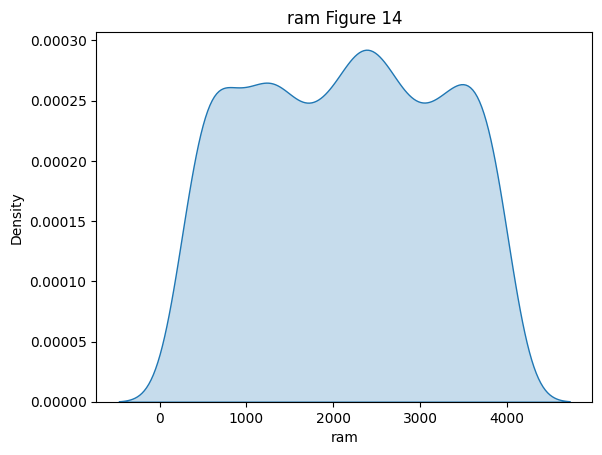

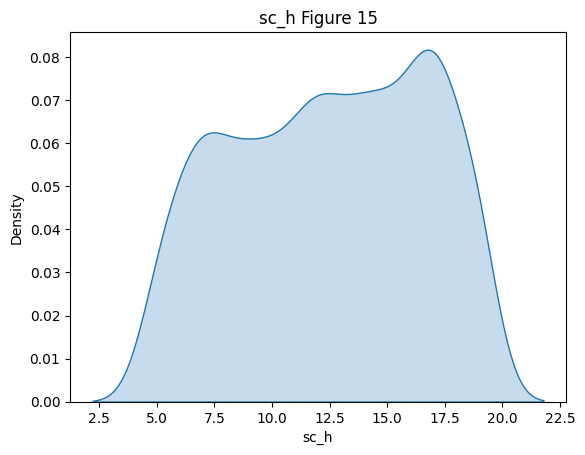

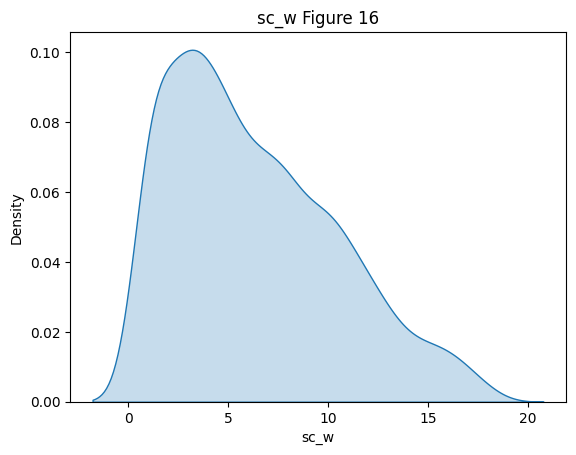

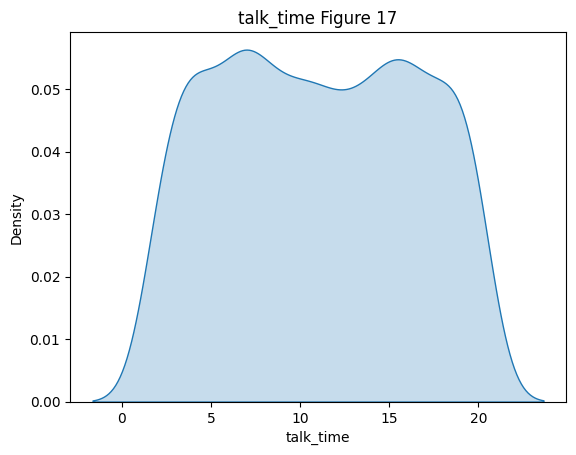

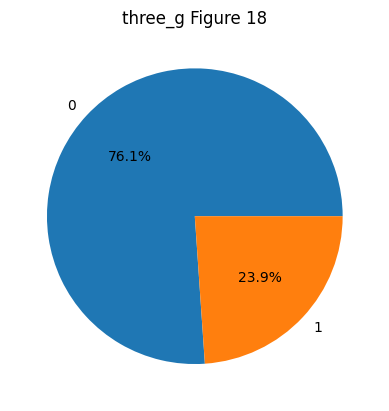

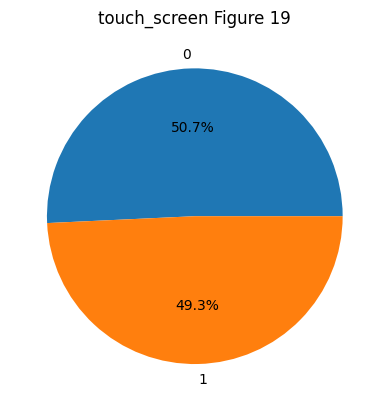

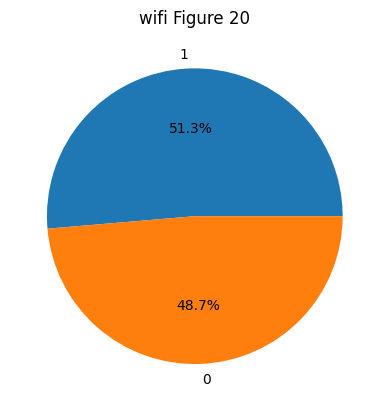

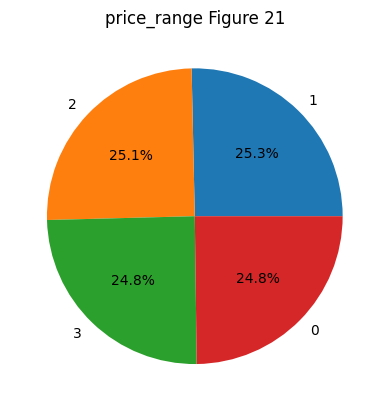

In [444]:
# show data by making chart from each column by using pie chart if the column is discrete (less than 10 unique values) and histogram if the column is continuous
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_train.columns):
    if len(df_train[col].unique()) <= 10:
        plt.pie(df_train[col].value_counts(),
                labels=df_train[col].unique(), autopct='%1.1f%%')
        plt.title(f'{col} Figure {i+1}')
        plt.show()
    else:
        sns.kdeplot(df_train[col], fill=True)
        plt.title(f'{col} Figure {i+1}')
        plt.show()

Plot เทียบกับ Price Range กับค่าอื่นๆ

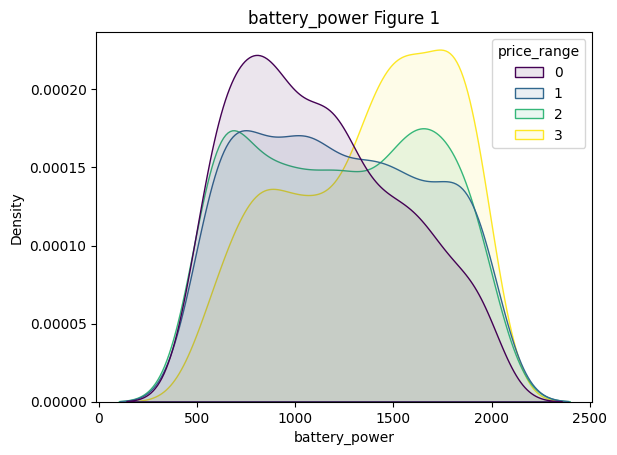

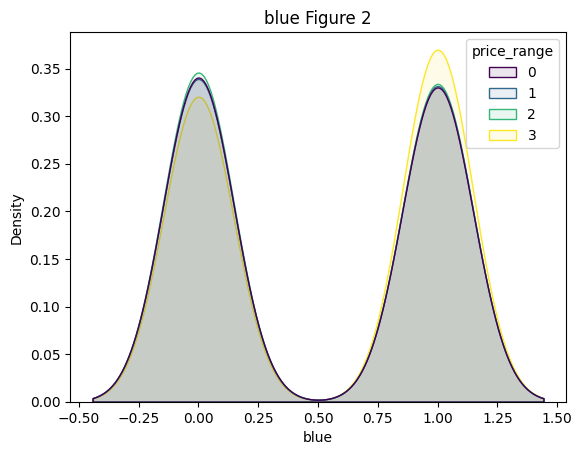

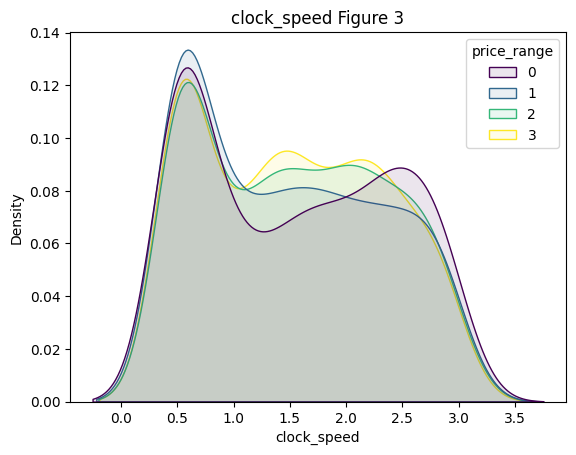

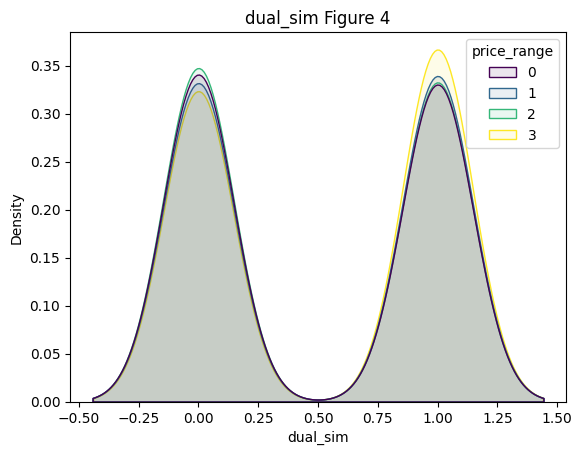

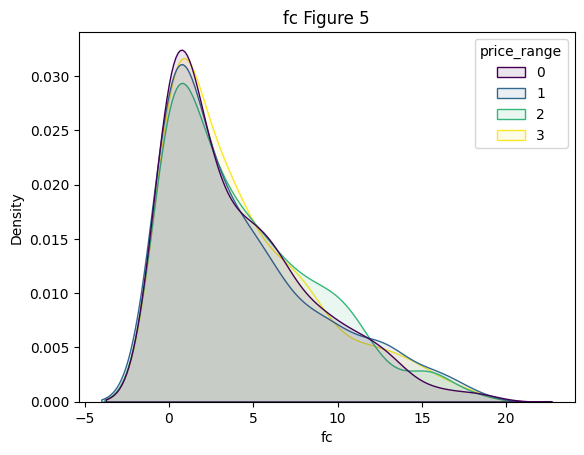

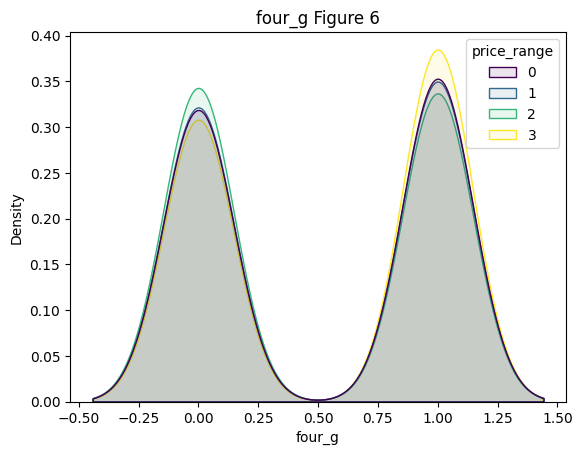

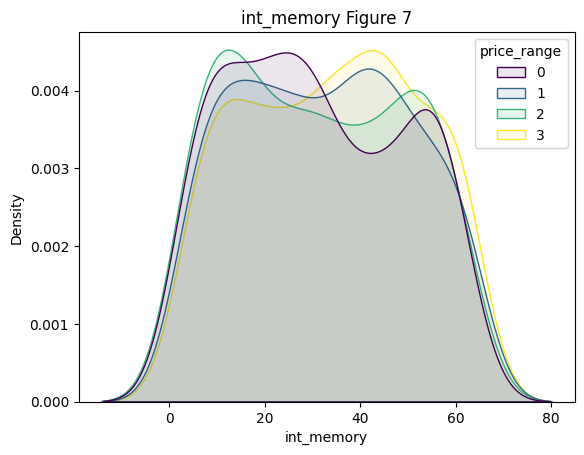

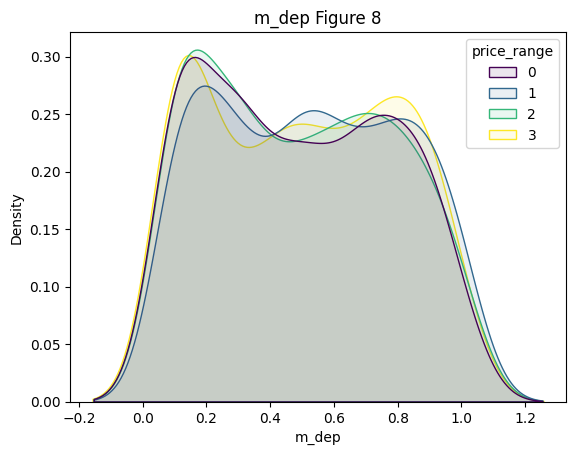

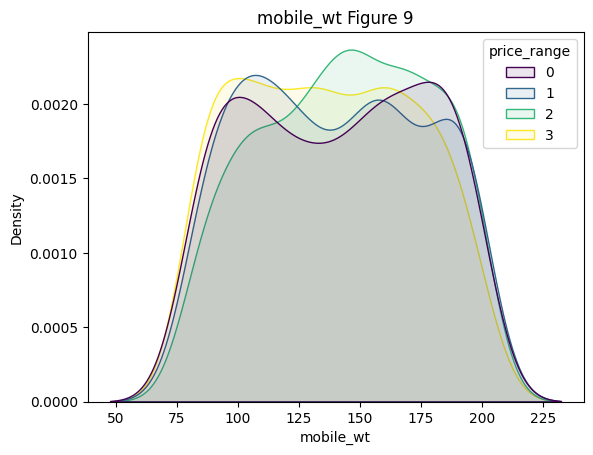

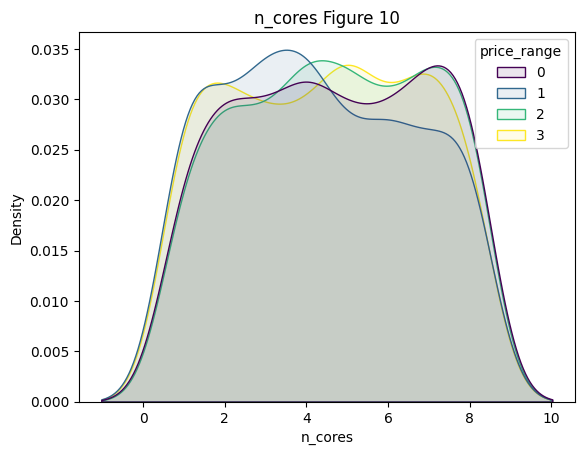

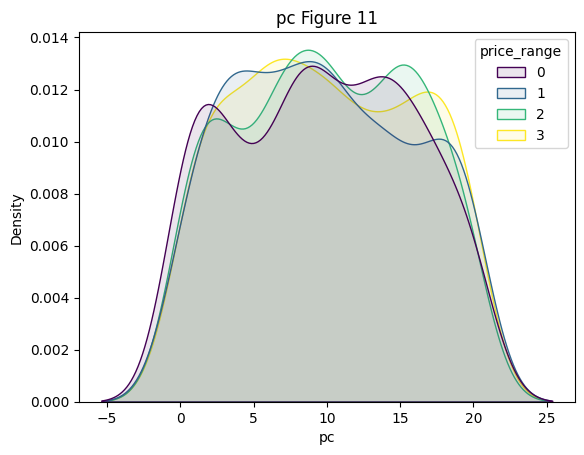

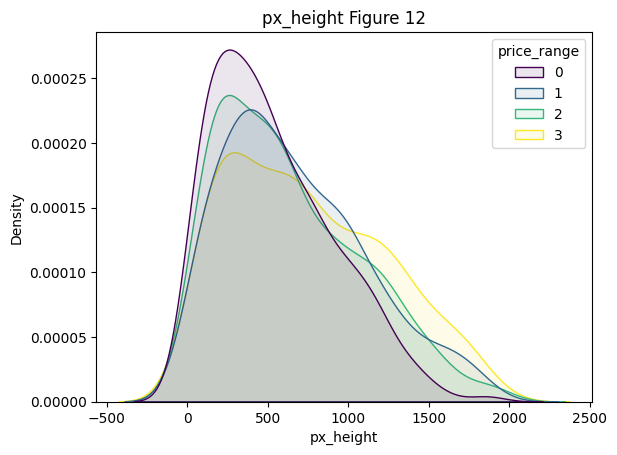

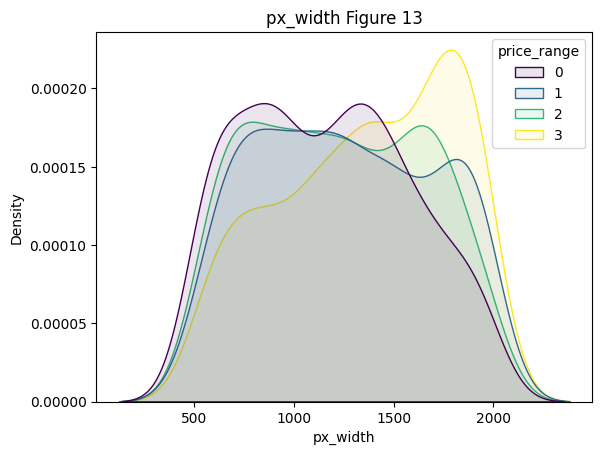

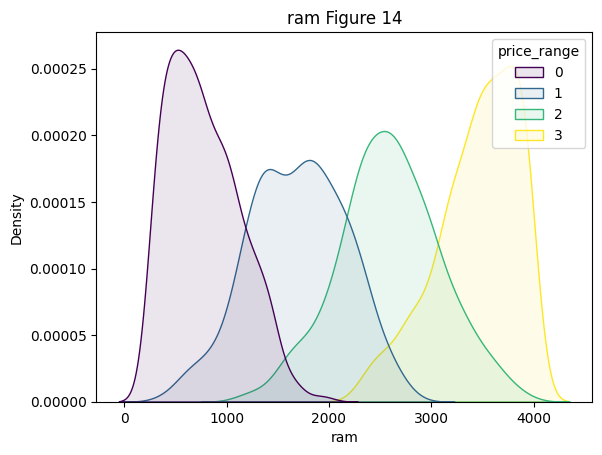

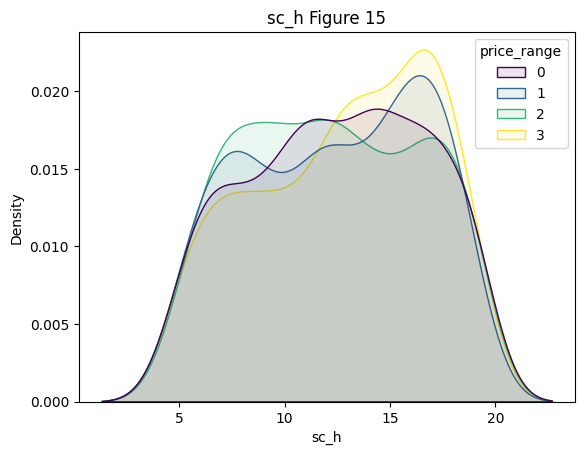

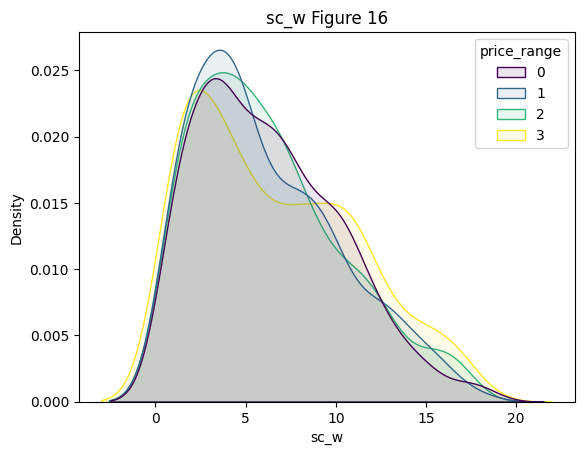

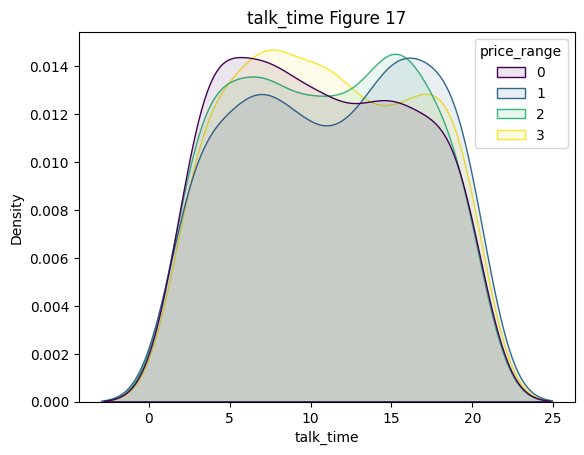

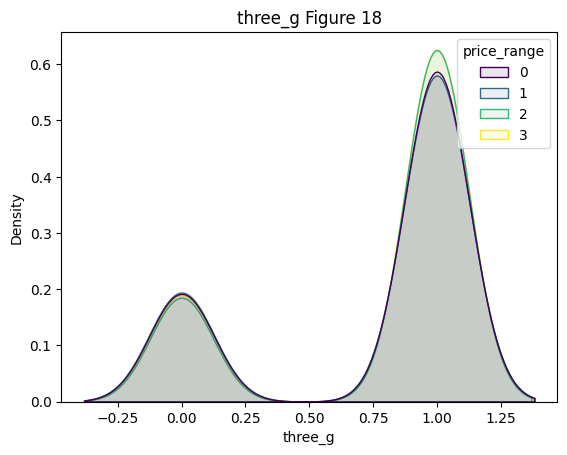

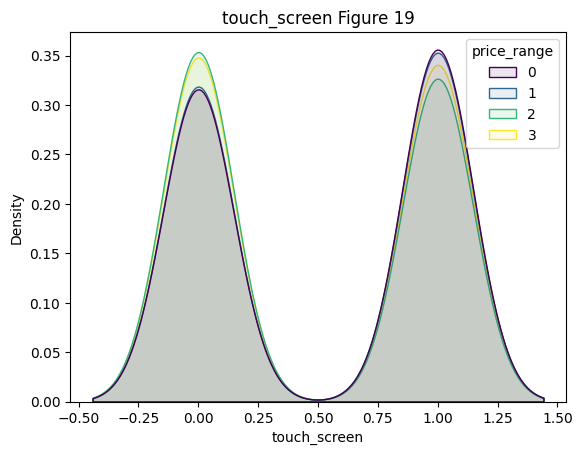

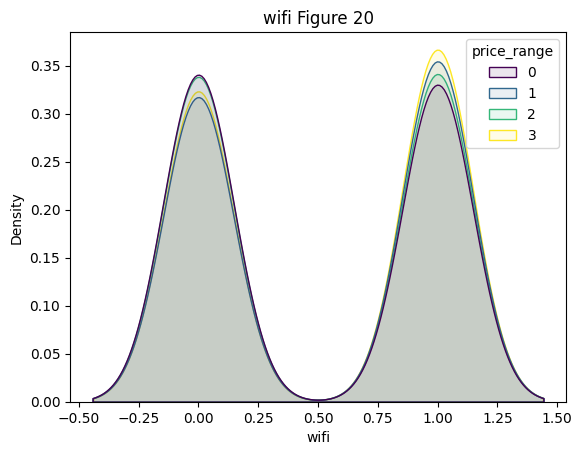

In [445]:
for i, col in enumerate(df_train.columns):
    if col == 'price_range':
        continue
    # sns.kdeplot(df_train[col], fill=True) but add hue to show the price_range
    sns.kdeplot(data=df_train, x=col, hue='price_range',
                fill=True, palette='viridis', alpha=0.1)
    plt.title(f'{col} Figure {i+1}')
    plt.show()

ตั้งสมมติฐานจาก กราฟที่พร็อตมา จะเห็นว่า มี Ram และ battery power ที่มีความต่าง ระหว่าง Price Range ที่สูงกับต่ำ จึงเลือกใช้ Ram และ battery power ในการทำนาย Price Range

In [446]:
# find the correlation between each column
# find corr on each column with price_range column
# make new dataframe to store the correlation
for i, col in enumerate(df_train.columns):

    if col == 'price_range':
        continue

    # find the correlation
    corr = df_train[col].corr(df_train['price_range'])

    # store the correlation to new dataframe
    if i == 0:
        df_corr = pd.DataFrame({'feature': [col], 'corr': [corr]})
    else:
        df_corr.loc[len(df_corr)] = [col, corr]

# sort with the highest correlation then plot the heatmap
df_corr = df_corr.sort_values(by='corr', ascending=False, ignore_index=True)
plt.figure(figsize=(12, 6))
# plot from df_corr
df_corr

,feature,corr
0,ram,0.917045
1,battery_power,0.193879
2,px_width,0.150435
3,px_height,0.149783
4,int_memory,0.051512
5,sc_w,0.031775
6,blue,0.028674
7,sc_h,0.024171
8,pc,0.023224
9,dual_sim,0.022761


<Figure size 1200x600 with 0 Axes>

In [447]:
tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
tree.fit(df_train.drop('price_range', axis=1), df_train['price_range'])

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

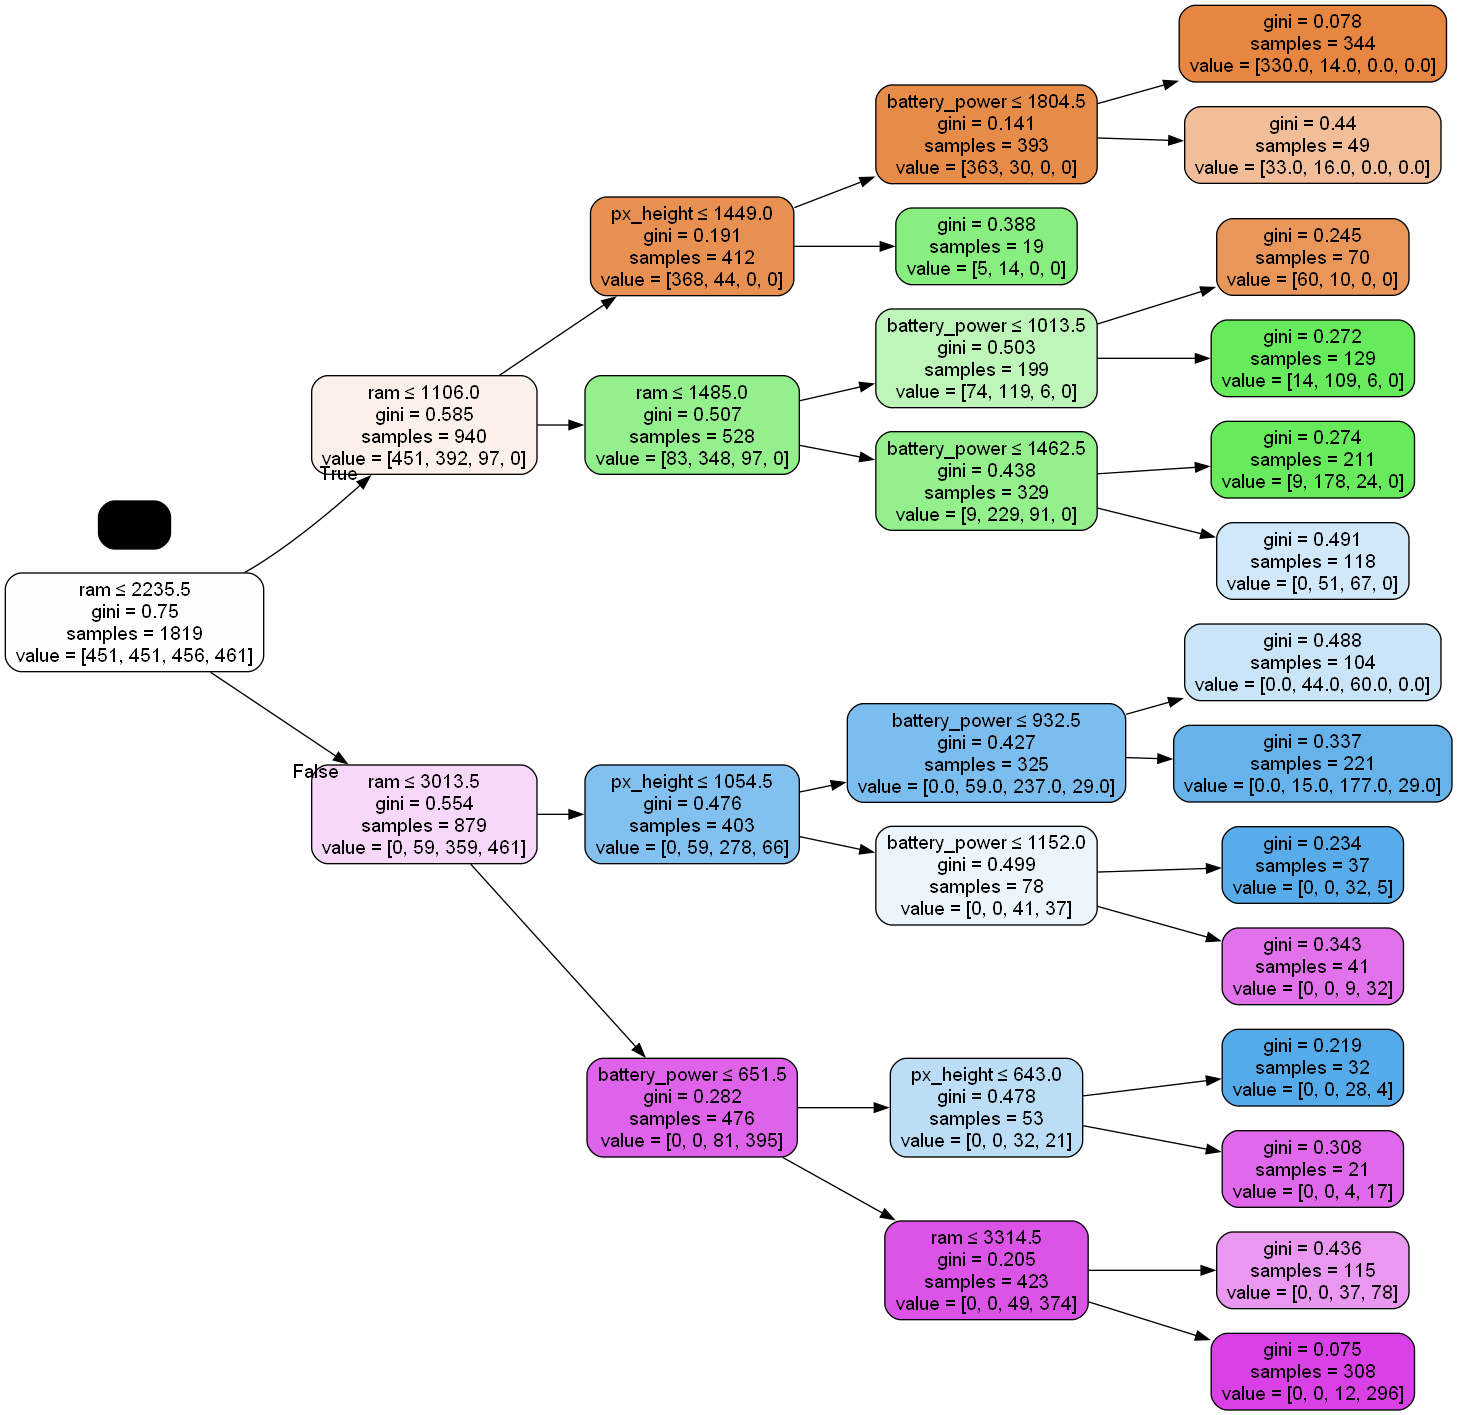

In [448]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=df_train.drop('price_range', axis=1).columns, filled=True, rounded=True, special_characters=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [449]:
def split_data(df, train_size=0.8):
    # return 4 data by x_train, x_test, y_train, y_test
    df_train = df.sample(frac=train_size, random_state=0)
    df_test = df.drop(df_train.index)
    x_train = df_train.drop('price_range', axis=1)
    x_test = df_test.drop('price_range', axis=1)
    y_train = df_train['price_range']
    y_test = df_test['price_range']

    return x_train, x_test, y_train, y_test

In [450]:
def train_model(x_train, y_train,max_depth):
    # return the model
    tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=max_depth)
    tree.fit(x_train, y_train)
    return tree

In [451]:
def test_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [452]:
# loop to get the graph of accuracy score with different max_depth and test_size
max_depths = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

model_lists = []
accuracy_lists = []
train_size_lists = []
max_depth_lists = []

for train_size in train_sizes:
    for max_depth in max_depths:
        x_train, x_test, y_train, y_test = split_data(df_train, train_size)
        model = train_model(x_train, y_train,max_depth)
        accuracy = test_model(model, x_train, x_test, y_train, y_test)
        model_lists.append(model)
        accuracy_lists.append(accuracy)
        train_size_lists.append(train_size)
        max_depth_lists.append(max_depth)

# make new dataframe to store the 4 lists
df_accuracy = pd.DataFrame({'model': model_lists, 'accuracy': accuracy_lists,
                           'train_size': train_size_lists, 'max_depth': max_depth_lists})

In [453]:
df_accuracy.sort_values(by='accuracy', ascending=False, ignore_index=True)

,model,accuracy,train_size,max_depth
0,"DecisionTreeClassifier(max_depth=7, min_sample...",0.849817,0.7,7
1,"DecisionTreeClassifier(max_depth=6, min_sample...",0.847985,0.7,6
2,"DecisionTreeClassifier(max_depth=8, min_sample...",0.847985,0.7,8
3,"DecisionTreeClassifier(max_depth=9, min_sample...",0.847985,0.7,9
4,"DecisionTreeClassifier(max_depth=10, min_sampl...",0.844322,0.7,10
...,...,...,...,...
85,"DecisionTreeClassifier(max_depth=8, min_sample...",0.739157,0.1,8
86,"DecisionTreeClassifier(max_depth=6, min_sample...",0.739157,0.1,6
87,"DecisionTreeClassifier(max_depth=5, min_sample...",0.739157,0.1,5
88,"DecisionTreeClassifier(max_depth=3, min_sample...",0.730769,0.9,3


In [454]:
# using the best model to predict the price_range of the test data
best_model = df_accuracy.loc[df_accuracy['accuracy'].idxmax()]['model']
best_model

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [455]:
best_model.feature_importances_

array([1.17706886e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.06903899e-04, 0.00000000e+00,
       2.44759015e-03, 0.00000000e+00, 0.00000000e+00, 9.04939630e-02,
       4.44623719e-02, 7.40942407e-01, 0.00000000e+00, 1.53337760e-04,
       3.08654072e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [456]:
# make the dataframe to store the feature importance
df_feature_importance = pd.DataFrame({'feature': df_train.drop(
    'price_range', axis=1).columns, 'importance': best_model.feature_importances_})
df_feature_importance = df_feature_importance.sort_values(
    by='importance', ascending=False, ignore_index=True)
df_feature_importance

,feature,importance
0,ram,0.740942
1,battery_power,0.117707
2,px_height,0.090494
3,px_width,0.044462
4,talk_time,0.003087
5,mobile_wt,0.002448
6,int_memory,0.000707
7,sc_w,0.000153
8,touch_screen,0.000000
9,three_g,0.000000


In [457]:
df_unseen = pd.read_csv('./data/CellPhone_test.csv')
df_unseen = df_unseen.drop_duplicates()
df_unseen = df_unseen.drop(df_unseen[df_unseen['px_height'] <= 0].index)
df_unseen = df_unseen.drop(df_unseen[df_unseen['sc_w'] <= 0].index)
df_unseen = df_unseen.drop('id', axis=1)
df_unseen['price_range'] = best_model.predict(df_unseen)
df_unseen

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
6,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,0
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,1
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [458]:
# classification_report
y_pred = best_model.predict(df_train.drop('price_range', axis=1))
y_test = df_train['price_range']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       451
           1       0.88      0.84      0.86       451
           2       0.85      0.84      0.84       456
           3       0.91      0.93      0.92       461

    accuracy                           0.89      1819
   macro avg       0.89      0.89      0.89      1819
weighted avg       0.89      0.89      0.89      1819



In [459]:
# make random forest classifier
from sklearn.ensemble import RandomForestClassifier

def train_model_rf(x_train, y_train, n_estimators=100, max_depth=4):
    # return the model
    rf = RandomForestClassifier(n_estimators=100, max_depth=4)
    rf.fit(x_train, y_train)
    return rf
def test_model_rf(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [463]:
# train random forest model with the best model
rf_model_lists = []
rf_accuracy_lists = []
rf_train_size_lists = []
rf_max_depth_lists = []
scalar = StandardScaler()
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
max_depths = [3,4,5,6,7,8,9,10,11,12]
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for train_size in train_sizes:
    for max_depth in max_depths:
        for n_estimator in n_estimators:
            x_train, x_test, y_train, y_test = split_data(df_train, train_size)
            rf = train_model_rf(x_train, y_train, n_estimator, max_depth)
            accuracy = test_model_rf(rf, x_train, x_test, y_train, y_test)
            rf_model_lists.append(rf)
            rf_accuracy_lists.append(accuracy)
            rf_train_size_lists.append(train_size)
            rf_max_depth_lists.append(max_depth)
rf_accuracy = pd.DataFrame({'model': rf_model_lists, 'accuracy': rf_accuracy_lists, 'train_size': rf_train_size_lists, 'max_depth': rf_max_depth_lists})

In [461]:
# show the best random forest model
rf_accuracy.sort_values(by='accuracy', ascending=False, ignore_index=True).head()

,model,accuracy,train_size,max_depth
0,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.835165,0.9,7
1,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.826923,0.9,10
2,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.824176,0.9,4
3,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.824176,0.9,12
4,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.824176,0.9,6
